Compare climate feedback processes between Winton & Semtner 0L, ICON-A

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
from os import path
import sys, importlib
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline
from scipy import integrate

sys.path.append("../../python_packages")
import ICON_tools
import EBMs
importlib.reload(ICON_tools)
importlib.reload(EBMs)

<module 'EBMs' from '../../python_packages/EBMs.py'>

In [2]:
def get_std_diff(data1, data2, axis=0):
    std_1 = np.nanstd(data1,axis=0)
    std_2 = np.nanstd(data2,axis=0)

    n_1=np.count_nonzero(~np.isnan(data1),axis=0)
    n_2=np.count_nonzero(~np.isnan(data2),axis=0)
    std_diff = np.sqrt(((std_1**2)/n_1)+(std_2**2)/n_2)

    return std_diff

In [3]:
data_path="/jetfs/scratch/jhoerner/postprocessing"
explist_W, nexp_W = ICON_tools.get_explist(data_path, ["ape_ia_7000_56_3W", "ape_ia_8000_90_3W", "ape_ia_8500_90_3W", "ape_ia_9000_90_3W", "ape_ia_10000_41_3W", "ape_ia_15000_17_3W"])
explist_S, nexp_S = ICON_tools.get_explist(data_path, ["ape_ia_5000_13_0S", "ape_ia_5500_90_0S", "ape_ia_6000_90_0S", "ape_ia_6000_90_0S_cltlim_dtime10", "ape_ia_6500_90_0S_cltlim_dtime10", "ape_ia_8000_13_0S", "ape_ia_9000_13_0S", "ape_ia_10000_13_0S" ]) # , "ape_ia_6500_90_0S" , "ape_ia_7000_62_0S"


DSlistgm_W_decode=np.empty([nexp_W],dtype="object")
DSlistgm_W=np.empty([nexp_W],dtype="object")
DSlistzm_W_decode=np.empty([nexp_W],dtype="object")
DSlistgmym_W=np.empty([nexp_W],dtype="object")
DSlistzmym_W=np.empty([nexp_W],dtype="object")

DSlistgm_W, _ =ICON_tools.load_ds_2d(data_path,explist_W)

DSlistgm_S_decode=np.empty([nexp_S],dtype="object")
DSlistgm_S=np.empty([nexp_S],dtype="object")
DSlistzm_S_decode=np.empty([nexp_S],dtype="object")
DSlistgmym_S=np.empty([nexp_S],dtype="object")
DSlistzmym_S=np.empty([nexp_S],dtype="object")

DSlistgm_S, _ =ICON_tools.load_ds_2d(data_path,explist_S)

# load the data again with decoded times, as decoding afterwards doesn't seem to work...
DSlistgm_W_decode, DSlistzm_W_decode=ICON_tools.load_ds_2d(data_path,explist_W, True)
DSlistgm_S_decode, DSlistzm_S_decode=ICON_tools.load_ds_2d(data_path,explist_S, True)


for i in range(nexp_W):
    #fillna 
    DSlistzm_W_decode[i] = DSlistzm_W_decode[i].where(DSlistgm_W_decode[i]['sic'] < 1e36)
    DSlistgm_W[i] = DSlistgm_W[i].where(DSlistgm_W[i]['sic'] < 1e36)  
    DSlistgm_W_decode[i] = DSlistgm_W_decode[i].where(DSlistgm_W_decode[i]['sic'] < 1e36)
    
    print(explist_W[i] +" yearly mean")
    DSlistgmym_W[i]=xr.decode_cf(DSlistgm_W_decode[i]).groupby('time.year').mean(dim='time', skipna=False)
    DSlistzmym_W[i]=xr.decode_cf(DSlistzm_W_decode[i]).groupby('time.year').mean(dim='time', skipna=False)

for i in range(nexp_S):
    #fillna 
    DSlistzm_S_decode[i] = DSlistzm_S_decode[i].where(DSlistgm_S_decode[i]['sic'] < 1e36)  
    DSlistgm_S[i] = DSlistgm_S[i].where(DSlistgm_S[i]['sic'] < 1e36)  
    DSlistgm_S_decode[i] = DSlistgm_S_decode[i].where(DSlistgm_S_decode[i]['sic'] < 1e36)  

    print(explist_S[i] +" yearly mean")
    DSlistgmym_S[i]=xr.decode_cf(DSlistgm_S_decode[i]).groupby('time.year').mean(dim='time', skipna=False)
    DSlistzmym_S[i]=xr.decode_cf(DSlistzm_S_decode[i]).groupby('time.year').mean(dim='time', skipna=False)

colorlist=["C1","C0","C2","C3","C5","C6","C7"]
linestylelist=["-","--",":"]


ape_ia_7000_56_3W: directory is /jetfs/scratch/jhoerner/postprocessing/ape_ia_7000_56_3W
ape_ia_8000_90_3W: directory is /jetfs/scratch/jhoerner/postprocessing/ape_ia_8000_90_3W
ape_ia_8500_90_3W: directory is /jetfs/scratch/jhoerner/postprocessing/ape_ia_8500_90_3W
ape_ia_9000_90_3W: directory is /jetfs/scratch/jhoerner/postprocessing/ape_ia_9000_90_3W
ape_ia_10000_41_3W: directory is /jetfs/scratch/jhoerner/postprocessing/ape_ia_10000_41_3W
ape_ia_15000_17_3W: directory is /jetfs/scratch/jhoerner/postprocessing/ape_ia_15000_17_3W
ape_ia_5000_13_0S: directory is /jetfs/scratch/jhoerner/postprocessing/ape_ia_5000_13_0S
ape_ia_5500_90_0S: directory is /jetfs/scratch/jhoerner/postprocessing/ape_ia_5500_90_0S
ape_ia_6000_90_0S: directory is /jetfs/scratch/jhoerner/postprocessing/ape_ia_6000_90_0S
ape_ia_6000_90_0S_cltlim_dtime10: directory is /jetfs/scratch/jhoerner/postprocessing/ape_ia_6000_90_0S_cltlim_dtime10
ape_ia_6500_90_0S_cltlim_dtime10: directory is /jetfs/scratch/jhoerner/postp

## Simulations

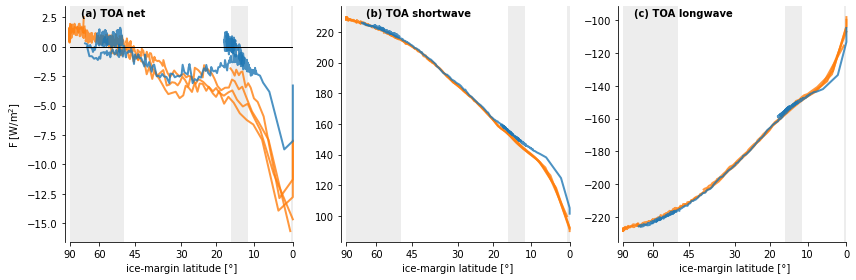

In [4]:
omitlast = True
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax2 = np.empty(np.shape(ax), dtype="object")

alpha = 0.8
xfac = 1
firstind = 2
if omitlast:
    lastind = -1




axind = 0
j = 0
ax[axind].hlines(0,xfac*-1,xfac*2,color="black", lw=1)
explist=explist_W
color=colorlist[j]
for i, exp in enumerate(explist): # simulations
    x=xfac*(DSlistgmym_W[i]["sic"].squeeze()[firstind:lastind])
    y=((DSlistgmym_W[i]["rsdt"].squeeze()-DSlistgmym_W[i]["rsut"].squeeze()-DSlistgmym_W[i]["rlut"].squeeze())[firstind:lastind])
    ax[axind].plot(x,y,color=color, ls=linestylelist[0],  lw=2, label=exp, alpha=alpha, clip_on=False)
j=1
explist=explist_S
color=colorlist[j]
for i, exp in enumerate(explist): # simulations
    x=xfac*(DSlistgmym_S[i]["sic"].squeeze()[firstind:lastind])
    y=((DSlistgmym_S[i]["rsdt"].squeeze()-DSlistgmym_S[i]["rsut"].squeeze()-DSlistgmym_S[i]["rlut"].squeeze())[firstind:lastind])
    ax[axind].plot(x,y,color=color, ls=linestylelist[0],  lw=2, label=exp, alpha=alpha, clip_on=False)

    # indixes of every 100th year
    ind = ((DSlistgmym_S[i].year[firstind:lastind]-DSlistgmym_S[i].year[firstind]+1).values % 50 ==0)


axind=1
j=0

explist = explist_W
color = colorlist[j]
for i, exp in enumerate(explist): # simulations
    x = xfac*(DSlistgmym_W[i]["sic"].squeeze()[firstind:lastind])
    y = ((DSlistgmym_W[i]["rsdt"].squeeze()-DSlistgmym_W[i]["rsut"].squeeze())[firstind:lastind])

    lW, = ax[axind].plot(x, y, color=color, ls=linestylelist[0], lw=2, label=exp, alpha=alpha, clip_on=False)

j=1
explist=explist_S
color=colorlist[j]
for i, exp in enumerate(explist): # simulations
    x=xfac*(DSlistgmym_S[i]["sic"].squeeze()[firstind:lastind])
    y=((DSlistgmym_S[i]["rsdt"].squeeze()-DSlistgmym_S[i]["rsut"].squeeze())[firstind:lastind])
    lS, =ax[axind].plot(x,y,color=color, ls=linestylelist[0],  lw=2, label=exp,alpha=alpha, clip_on=False)



axind=2
j=0
explist=explist_W
color=colorlist[j]
for i, exp in enumerate(explist): # simulations
    x=xfac*(DSlistgmym_W[i]["sic"].squeeze()[firstind:lastind])
    y=((-DSlistgmym_W[i]["rlut"].squeeze())[firstind:lastind])
    ax[axind].plot(x,y,color=color, ls=linestylelist[0],  lw=2, label=exp,alpha=alpha, clip_on=False)
j=1
explist=explist_S
color=colorlist[j]
for i, exp in enumerate(explist): # simulations
    x=xfac*(DSlistgmym_S[i]["sic"].squeeze()[firstind:lastind])
    y=((-DSlistgmym_S[i]["rlut"].squeeze())[firstind:lastind])
    ax[axind].plot(x,y,color=color, ls=linestylelist[0],  lw=2, label=exp,alpha=alpha, clip_on=False)


xticks=[90,60,45,30,20,10,0]

ax[0].set_ylabel("F [W/m$^2$]")
ax[0].annotate("(a) TOA net", xycoords="axes fraction", xy=(0.05,0.96), fontweight="bold")
ax[1].annotate("(b) TOA shortwave", xycoords="axes fraction", xy=(0.09,0.96), fontweight="bold")
ax[2].annotate("(c) TOA longwave", xycoords="axes fraction", xy=(0.05,0.96), fontweight="bold")

ax[0].hlines(0,xfac*-1,xfac*2,color="black", lw=1)

for axind in [0,1,2]:
    ax[axind].set_xlim(0,xfac*1)
    ax[axind].set_xlabel("ice-margin latitude [°]")
    ax[axind].set_xticks(xfac*(ICON_tools.icelatosic(xticks)))
    ax[axind].set_xticklabels(xticks)
    ax[axind].spines['top'].set_visible(False)
    ax[axind].spines['right'].set_visible(False)
    ax[axind].spines['left'].set_position(('outward',5))
    ax[axind].set_zorder(1)
    ax[axind].axvspan(0,ICON_tools.icelatosic(49), color='lightgray', alpha=0.4, lw=0)
    ax[axind].axvspan(ICON_tools.icelatosic(16), ICON_tools.icelatosic(11.5), color='lightgray', alpha=0.4, lw=0)
    ax[axind].axvspan(0.99, 1, color='lightgray', alpha=0.4, lw=0)

    if axind>2:
        ax2[axind].set_zorder(0)
        ax[axind].patch.set_visible(False)
        ax2[axind].patch.set_visible(True)
        ax2[axind].spines['top'].set_visible(False)
        ax2[axind].spines['left'].set_visible(False)
        ax2[axind].spines['bottom'].set_visible(False)
        ax2[axind].spines['right'].set_position(('outward',5))



plt.tight_layout()



plt.savefig("plots/Fig5-climatefeedback.pdf")